In [2]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [43]:
# Define all string variables for metrics
branch_misses = "Branch Misses"
branch_instructions = "Branch Instructions"
branch_miss_rate = "Branch Miss Rate"

cache_misses = "Cache Misses"
cache_references = "Cache References"
cache_miss_rate = "Cache Miss Rate"

executed_branch_mispredictions = "Executed Branch Mispredictions"
executed_branch_instructions = "Executed Branch Instructions"
executed_branch_misprediction_rate = "Executed Branch Misprediction Rate"

retired_branch_mispredictions = "Retired Branch Mispredictions"
retired_branch_instructions = "Retired Branch Instructions"
retired_branch_misprediction_rate = "Retired Branch Misprediction Rate"

executed_conditional_branch_mispredictions = "Executed Conditional Branch Mispredictions"
executed_conditional_branches = "Executed Conditional Branches"
executed_conditional_misprediction_rate = "Executed Conditional Misprediction Rate"

retired_near_taken_mispredictions = "Retired Near-Taken Branch Mispredictions"
retired_conditional_branches = "Retired Conditional Branches"
retired_near_taken_misprediction_rate = "Retired Near-Taken to Conditional misprediction Rate"

# Variables provided by you for L1, L2, and L3 cache metrics
L1_data_load_misses = "L1 Data Cache Load Misses"
L1_data_load_all = "L1 Data Cache Loads"
L1_data_load_miss_rate = "L1 Data Cache Load Miss Rate"

L2_demand_data_read_hits = "L2 Demand Data Read Hits"
L2_demand_data_read_all = "L2 All Demand Data Reads"
L2_demand_data_read_hit_rate = "L2 Demand Data Read Hit Ratio"

L3_demand_data_read_misses = "Offcore Demand Data Reads LLC Miss to DRAM"
L3_demand_data_read_hits = "Offcore Demand Data Reads LLC Hit Any Response"
L3_demand_data_read_miss_rate = "Offcore Demand Data Reads LLC Miss Rate"

L3_all_data_read_all = "Offcore All Data Reads LLC Any Response"
L3_all_data_read_misses = "Offcore All Data Reads LLC Miss to DRAM"
L3_all_data_read_miss_rate = "Offcore All Data Reads LLC miss rate"

# Define the rate pairs with meaningful names

rate_pairs = [
    (branch_misses, branch_instructions, branch_miss_rate),
    (cache_misses, cache_references, cache_miss_rate),
    (L1_data_load_misses, L1_data_load_all, L1_data_load_miss_rate),
    (L2_demand_data_read_hits, L2_demand_data_read_all, L2_demand_data_read_hit_rate),
    (L3_all_data_read_misses, L3_all_data_read_all, L3_all_data_read_miss_rate),
    (executed_branch_mispredictions, executed_branch_instructions, executed_branch_misprediction_rate),
    (retired_branch_mispredictions, retired_branch_instructions, retired_branch_misprediction_rate),
    (executed_conditional_branch_mispredictions, executed_conditional_branches, executed_conditional_misprediction_rate),
    (retired_near_taken_mispredictions, retired_conditional_branches, retired_near_taken_misprediction_rate),
    
]

def get_rate(df):
    """
    Compute logical rates from the given DataFrame based on predefined rate pairs.
    Returns a DataFrame with computed rates capped at 1 and infinities replaced with NaN.
    """
    rates_data = {}
    for numerator, denominator, rate_name in rate_pairs:
        rate = df[numerator] / df[denominator]
        rate.replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle infinities
        rate = rate.clip(upper=1)  # Cap the rate at 1
        rates_data[rate_name] = rate
    
    rate = df[L3_demand_data_read_misses] / df[L3_demand_data_read_misses]+df[L3_demand_data_read_hits]
    rate = df[numerator] / df[denominator]
    rate.replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle infinities
    rate.fillna(0, inplace=True)
    rate = rate.clip(upper=1)  # Cap the rate at 1
    rates_data[L3_demand_data_read_miss_rate] = rate
    
    return pd.DataFrame(rates_data)


In [44]:
# Cell 3: Load data and generate attack/idle rates

attack_file = "./../data/combined data files/Spectre/Spectre_20241118_122811.csv"
idle_file = "./../data/combined data files/Idle/Idle_20241118_122811.csv"

attack_data = pd.read_csv(attack_file)
idle_data = pd.read_csv(idle_file)

attack_data = attack_data.iloc[:500]
idle_data=idle_data.iloc[:500]

attack_rate = get_rate(attack_data)
idle_rate = get_rate(idle_data)


In [45]:
def plotFunction(metric_1, Metric_2, Metric_3,Metric_2_lim):
    print("starting: "+Metric_3)
    # Filter the non-zero values for metric_1
    nonzero_idle_data_1 = idle_data[idle_data[metric_1] != 0][metric_1]
    nonzero_attack_data_1 = attack_data[attack_data[metric_1] != 0][metric_1]

    # Calculate mean and standard deviation for non-zero values
    mean_1 = nonzero_idle_data_1.mean()
    std_1 = nonzero_idle_data_1.std()

    print(f"Mean of non-zero values (Idle, {metric_1}):", mean_1)
    print(f"Standard Deviation of non-zero values (Idle, {metric_1}):", std_1)

    # Normalize metric_1 data
    normalized_idle_data_1 = ((idle_data[metric_1] - mean_1) / std_1).where(idle_data[metric_1] != 0, 0)
    normalized_attack_data_1 = ((attack_data[metric_1] - mean_1) / std_1).where(attack_data[metric_1] != 0, 0)

    # Filter the non-zero values for Metric_2
    nonzero_idle_data_2 = idle_data[idle_data[Metric_2] != 0][Metric_2]
    nonzero_attack_data_2 = attack_data[attack_data[Metric_2] != 0][Metric_2]

    # Calculate mean and standard deviation for Metric_2
    mean_2 = nonzero_idle_data_2.mean()
    std_2 = nonzero_idle_data_2.std()

    print(f"Mean of non-zero values (Idle, {Metric_2}):", mean_2)
    print(f"Standard Deviation of non-zero values (Idle, {Metric_2}):", std_2)

    # Normalize Metric_2 data
    normalized_idle_data_2 = ((idle_data[Metric_2] - mean_2) / std_2).where(idle_data[Metric_2] != 0, 0)
    normalized_attack_data_2 = ((attack_data[Metric_2] - mean_2) / std_2).where(attack_data[Metric_2] != 0, 0)

    # Create subplots
    fig, axes = plt.subplots(5, 1, figsize=(10, 30), sharey=False)

    # Normalized metric_1
    axes[0].stem(normalized_idle_data_1.index, normalized_idle_data_1, linefmt='blue', markerfmt='bx', basefmt=" ", label=f"Idle (Normalized {metric_1})")
    axes[0].stem(normalized_attack_data_1.index, normalized_attack_data_1, linefmt='red', markerfmt='r.', basefmt=" ", label=f"Attack (Normalized {metric_1})")
    axes[0].axhline(0, color='green', linestyle='--', label='Zero Line')
    axes[0].set_title(f'Normalized {metric_1}')
    axes[0].set_ylim(-1, 4)
    axes[0].legend()

    # Actual metric_1
    axes[1].plot(idle_data.index, idle_data[metric_1], color='blue', marker='x', label=f"Idle ({metric_1})")
    axes[1].plot(attack_data.index, attack_data[metric_1], color='red', marker='.', label=f"Attack ({metric_1})")
    axes[1].set_title(f'Actual {metric_1}')
    axes[1].set_ylim(0, 25000)
    axes[1].legend()

    # Normalized Metric_2
    axes[2].stem(normalized_idle_data_2.index, normalized_idle_data_2, linefmt='blue', markerfmt='bx', basefmt=" ", label=f"Idle (Normalized {Metric_2})")
    axes[2].stem(normalized_attack_data_2.index, normalized_attack_data_2, linefmt='red', markerfmt='r.', basefmt=" ", label=f"Attack (Normalized {Metric_2})")
    axes[2].axhline(0, color='green', linestyle='--', label='Zero Line')
    axes[2].set_title(f'Normalized {Metric_2}')
    axes[2].set_ylim(-1, 4)
    axes[2].legend()

    # Actual Metric_2
    axes[3].plot(idle_data.index, idle_data[Metric_2], color='blue', marker='x', label=f"Idle ({Metric_2})")
    axes[3].plot(attack_data.index, attack_data[Metric_2], color='red', marker='.', label=f"Attack ({Metric_2})")
    axes[3].set_title(f'Actual {Metric_2}')
    axes[3].set_ylim(0, Metric_2_lim)
    axes[3].legend()

    # Actual Metric_3 (Rate)
    axes[4].plot(idle_rate.index, idle_rate[Metric_3], color='blue', marker='x', label=f"Idle ({Metric_3})")
    axes[4].plot(attack_rate.index, attack_rate[Metric_3], color='red', marker='.', label=f"Attack ({Metric_3})")
    axes[4].set_title(Metric_3)
    axes[4].set_ylim(0, 1)
    axes[4].legend()

    # Adjust layout
    plt.tight_layout()

    # Save the plot
    directory = "../images/single_metric_single_run/"
    os.makedirs(directory, exist_ok=True)
    fig.savefig(os.path.join(directory, f"{Metric_3}.png"))

    # Show the plot
#     plt.show()

starting: L1 Data Cache Load Miss Rate
Mean of non-zero values (Idle, L1 Data Cache Load Misses): 4603.607214428857
Standard Deviation of non-zero values (Idle, L1 Data Cache Load Misses): 4255.550004097891
Mean of non-zero values (Idle, L1 Data Cache Loads): 27690.0
Standard Deviation of non-zero values (Idle, L1 Data Cache Loads): 18971.359597296654


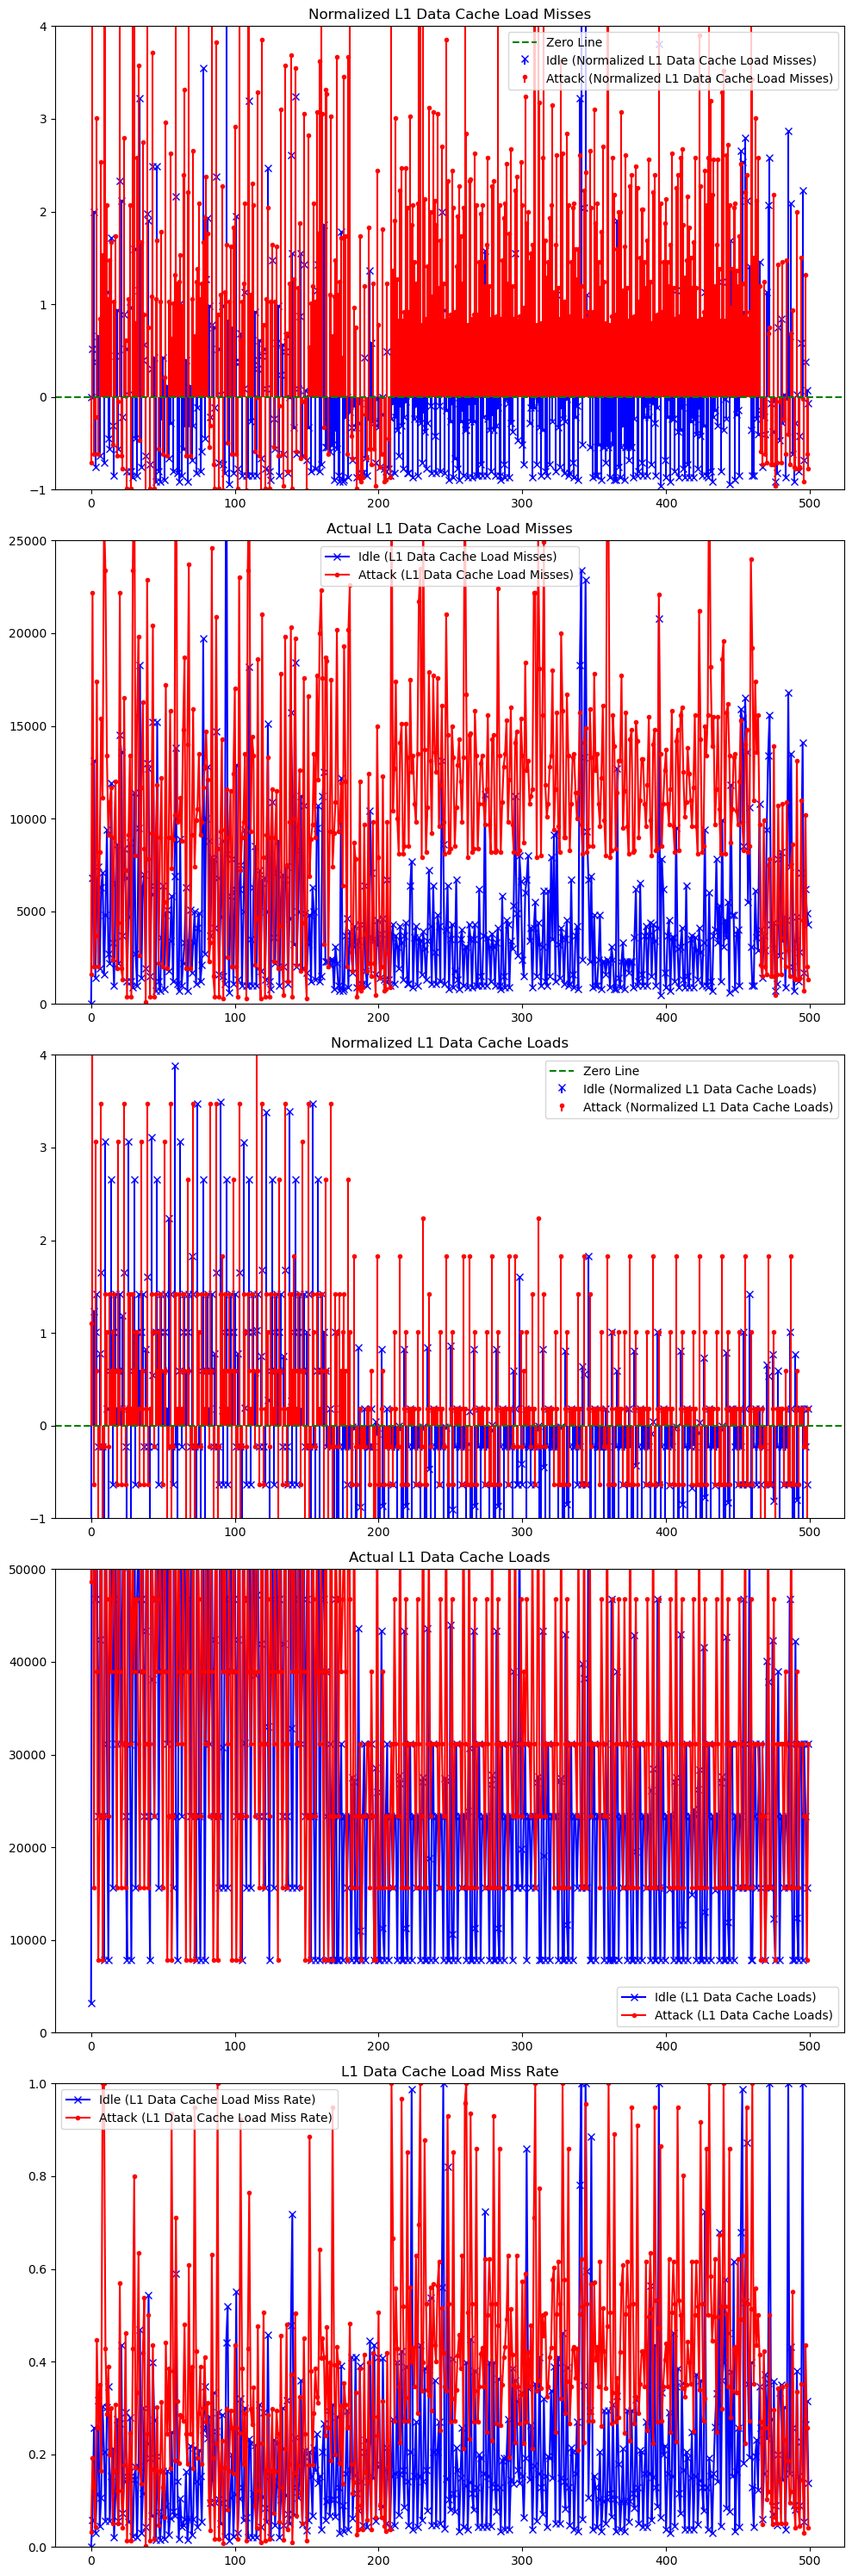

In [46]:
plotFunction(L1_data_load_misses,L1_data_load_all,L1_data_load_miss_rate,50000)

starting: L2 Demand Data Read Hit Ratio
Mean of non-zero values (Idle, L2 Demand Data Read Hits): 4824.064171122995
Standard Deviation of non-zero values (Idle, L2 Demand Data Read Hits): 7223.305215233471
Mean of non-zero values (Idle, L2 All Demand Data Reads): 7348.205128205128
Standard Deviation of non-zero values (Idle, L2 All Demand Data Reads): 8543.939454432275


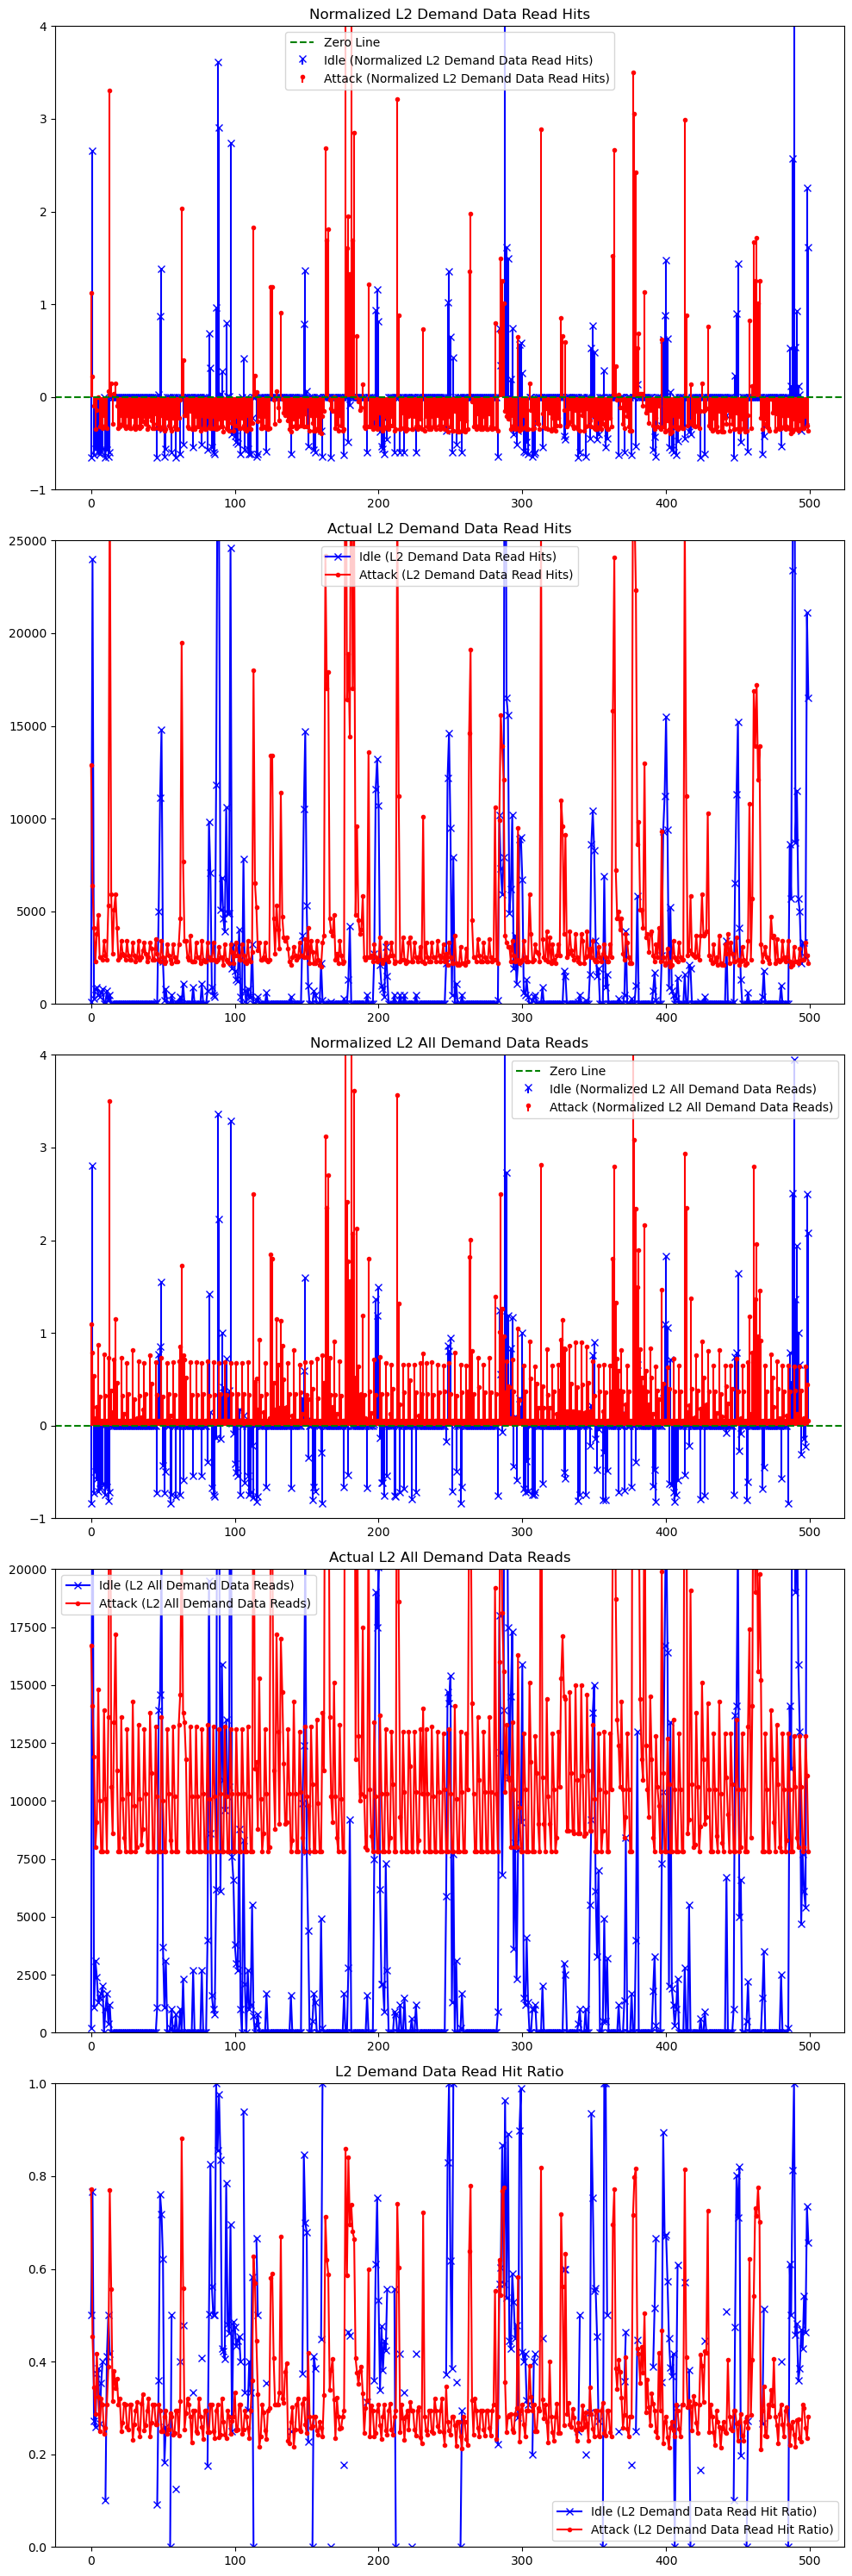

In [47]:
plotFunction(L2_demand_data_read_hits,L2_demand_data_read_all,L2_demand_data_read_hit_rate,20000)

starting: Offcore Demand Data Reads LLC Miss Rate
Mean of non-zero values (Idle, Offcore Demand Data Reads LLC Miss to DRAM): 1460.2941176470588
Standard Deviation of non-zero values (Idle, Offcore Demand Data Reads LLC Miss to DRAM): 2869.4551828756694
Mean of non-zero values (Idle, Offcore Demand Data Reads LLC Hit Any Response): 1293.939393939394
Standard Deviation of non-zero values (Idle, Offcore Demand Data Reads LLC Hit Any Response): 4540.901804301755


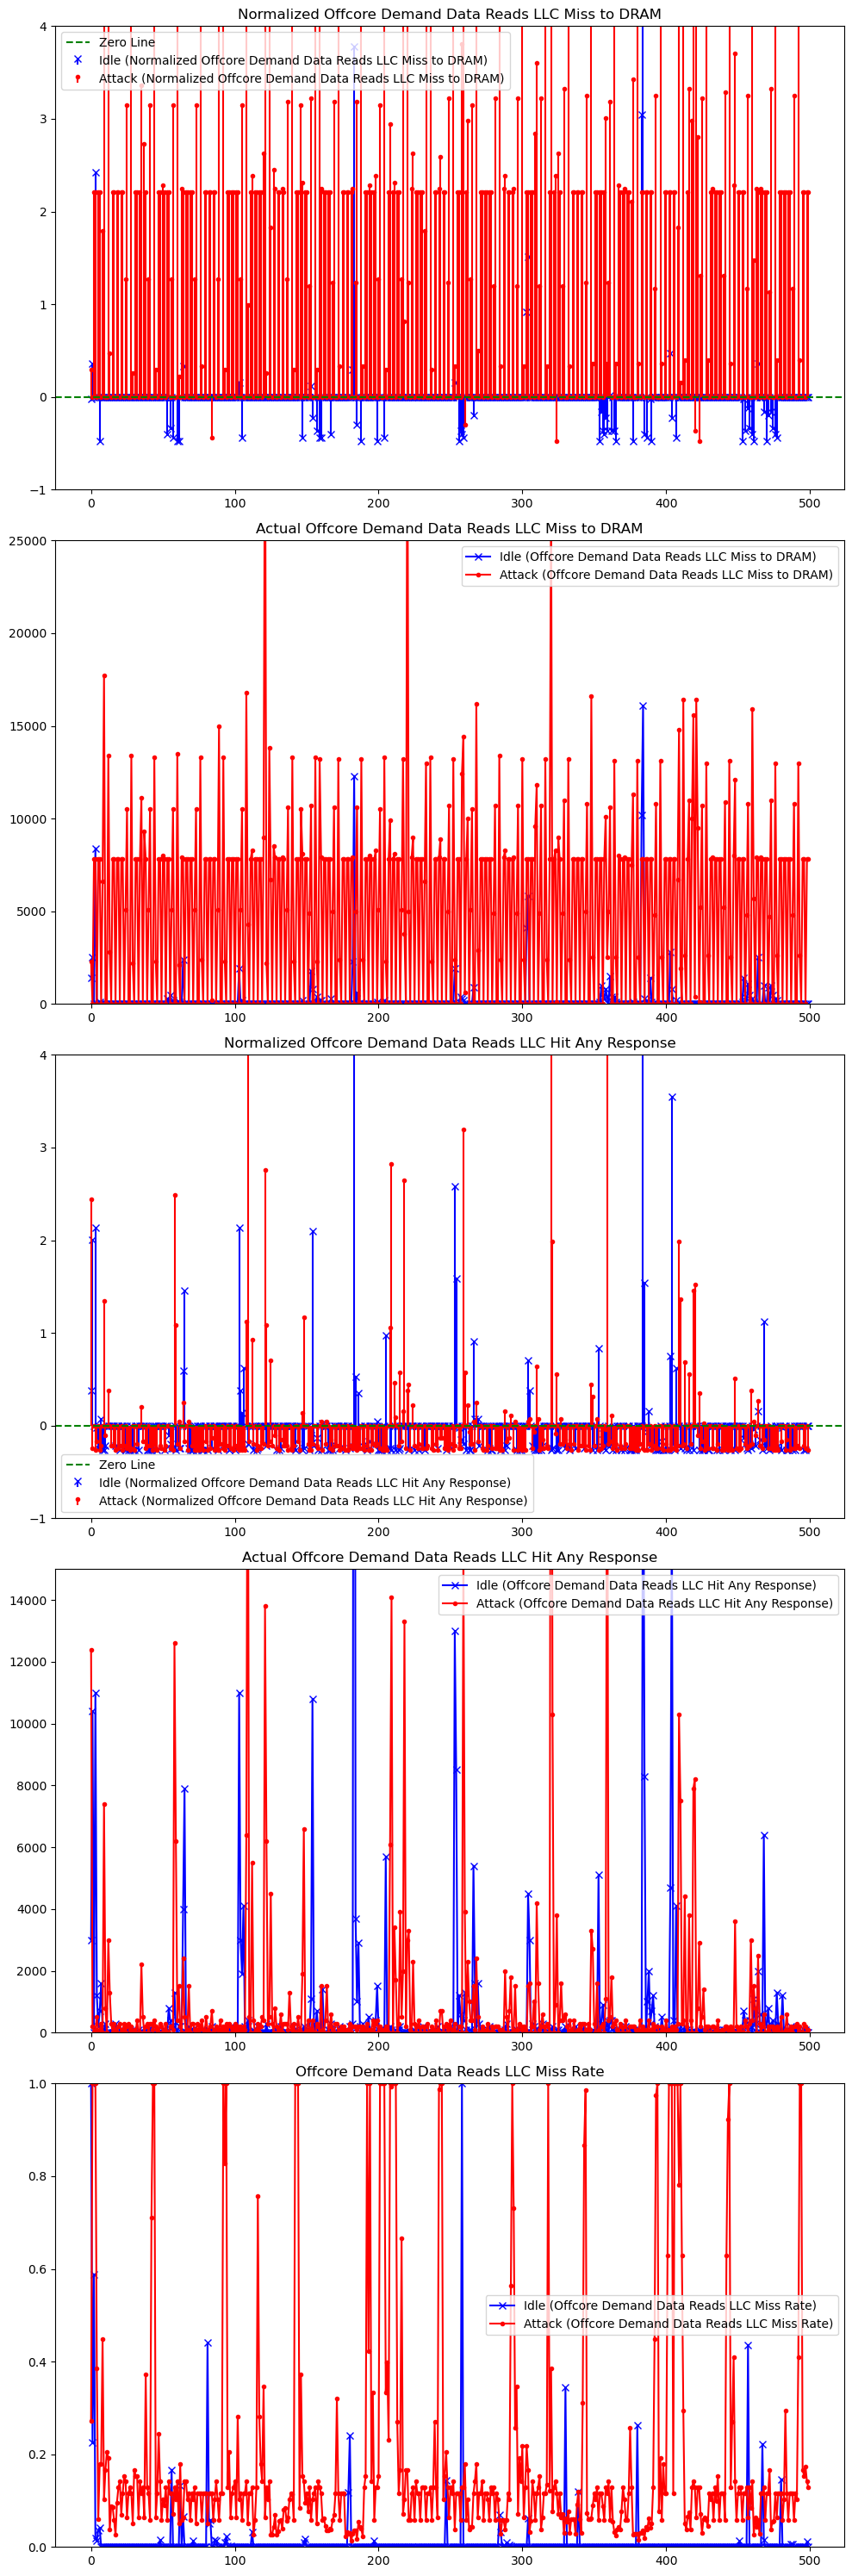

In [48]:
plotFunction(L3_demand_data_read_misses,L3_demand_data_read_hits,L3_demand_data_read_miss_rate,15000)

starting: Offcore All Data Reads LLC miss rate
Mean of non-zero values (Idle, Offcore All Data Reads LLC Miss to DRAM): 1292.6829268292684
Standard Deviation of non-zero values (Idle, Offcore All Data Reads LLC Miss to DRAM): 3345.6727344992332
Mean of non-zero values (Idle, Offcore All Data Reads LLC Any Response): 1506.8047337278106
Standard Deviation of non-zero values (Idle, Offcore All Data Reads LLC Any Response): 3463.2510536875225


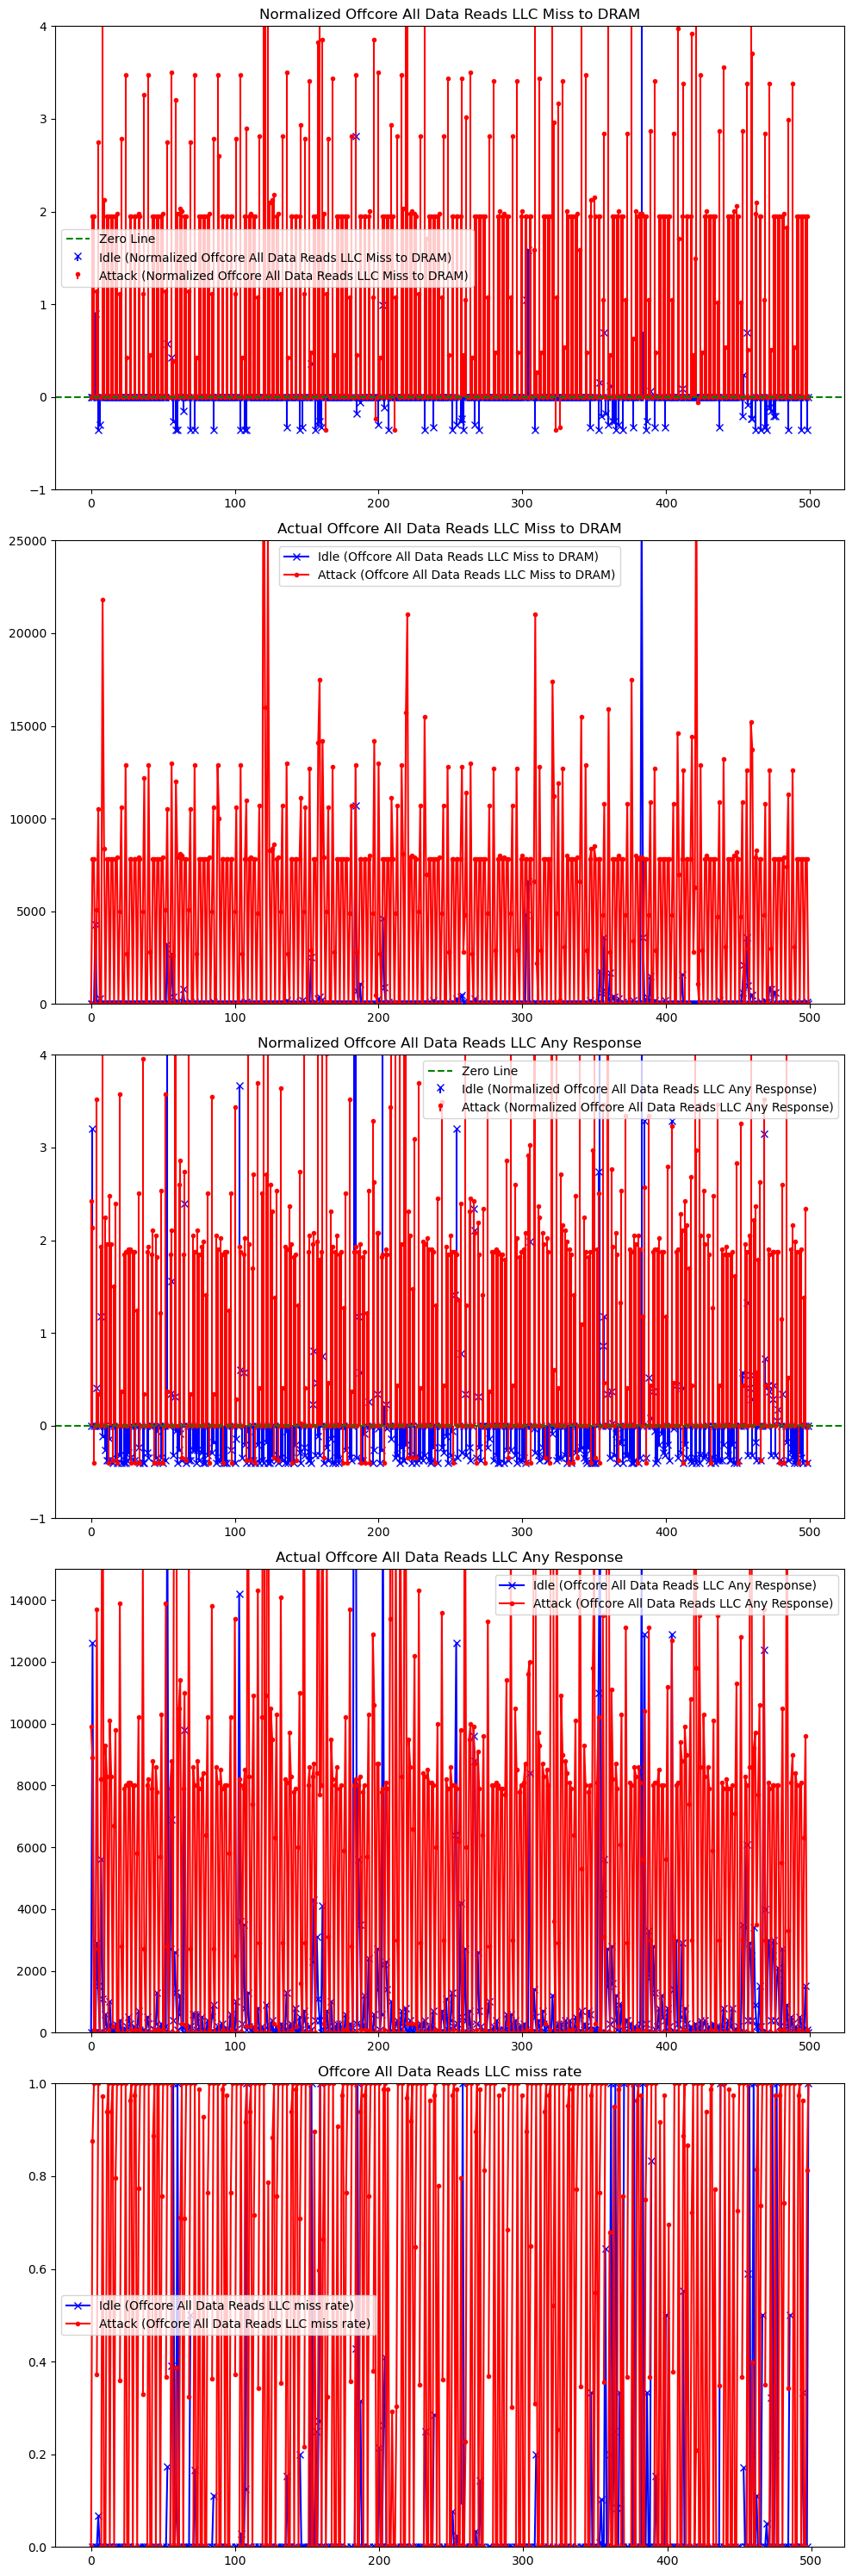

In [49]:
plotFunction(L3_all_data_read_misses,L3_all_data_read_all,L3_all_data_read_miss_rate,15000)

starting: Executed Branch Misprediction Rate
Mean of non-zero values (Idle, Executed Branch Mispredictions): 4794.148936170212
Standard Deviation of non-zero values (Idle, Executed Branch Mispredictions): 6381.927844713739
Mean of non-zero values (Idle, Executed Branch Instructions): 20234.26853707415
Standard Deviation of non-zero values (Idle, Executed Branch Instructions): 13138.364987860896


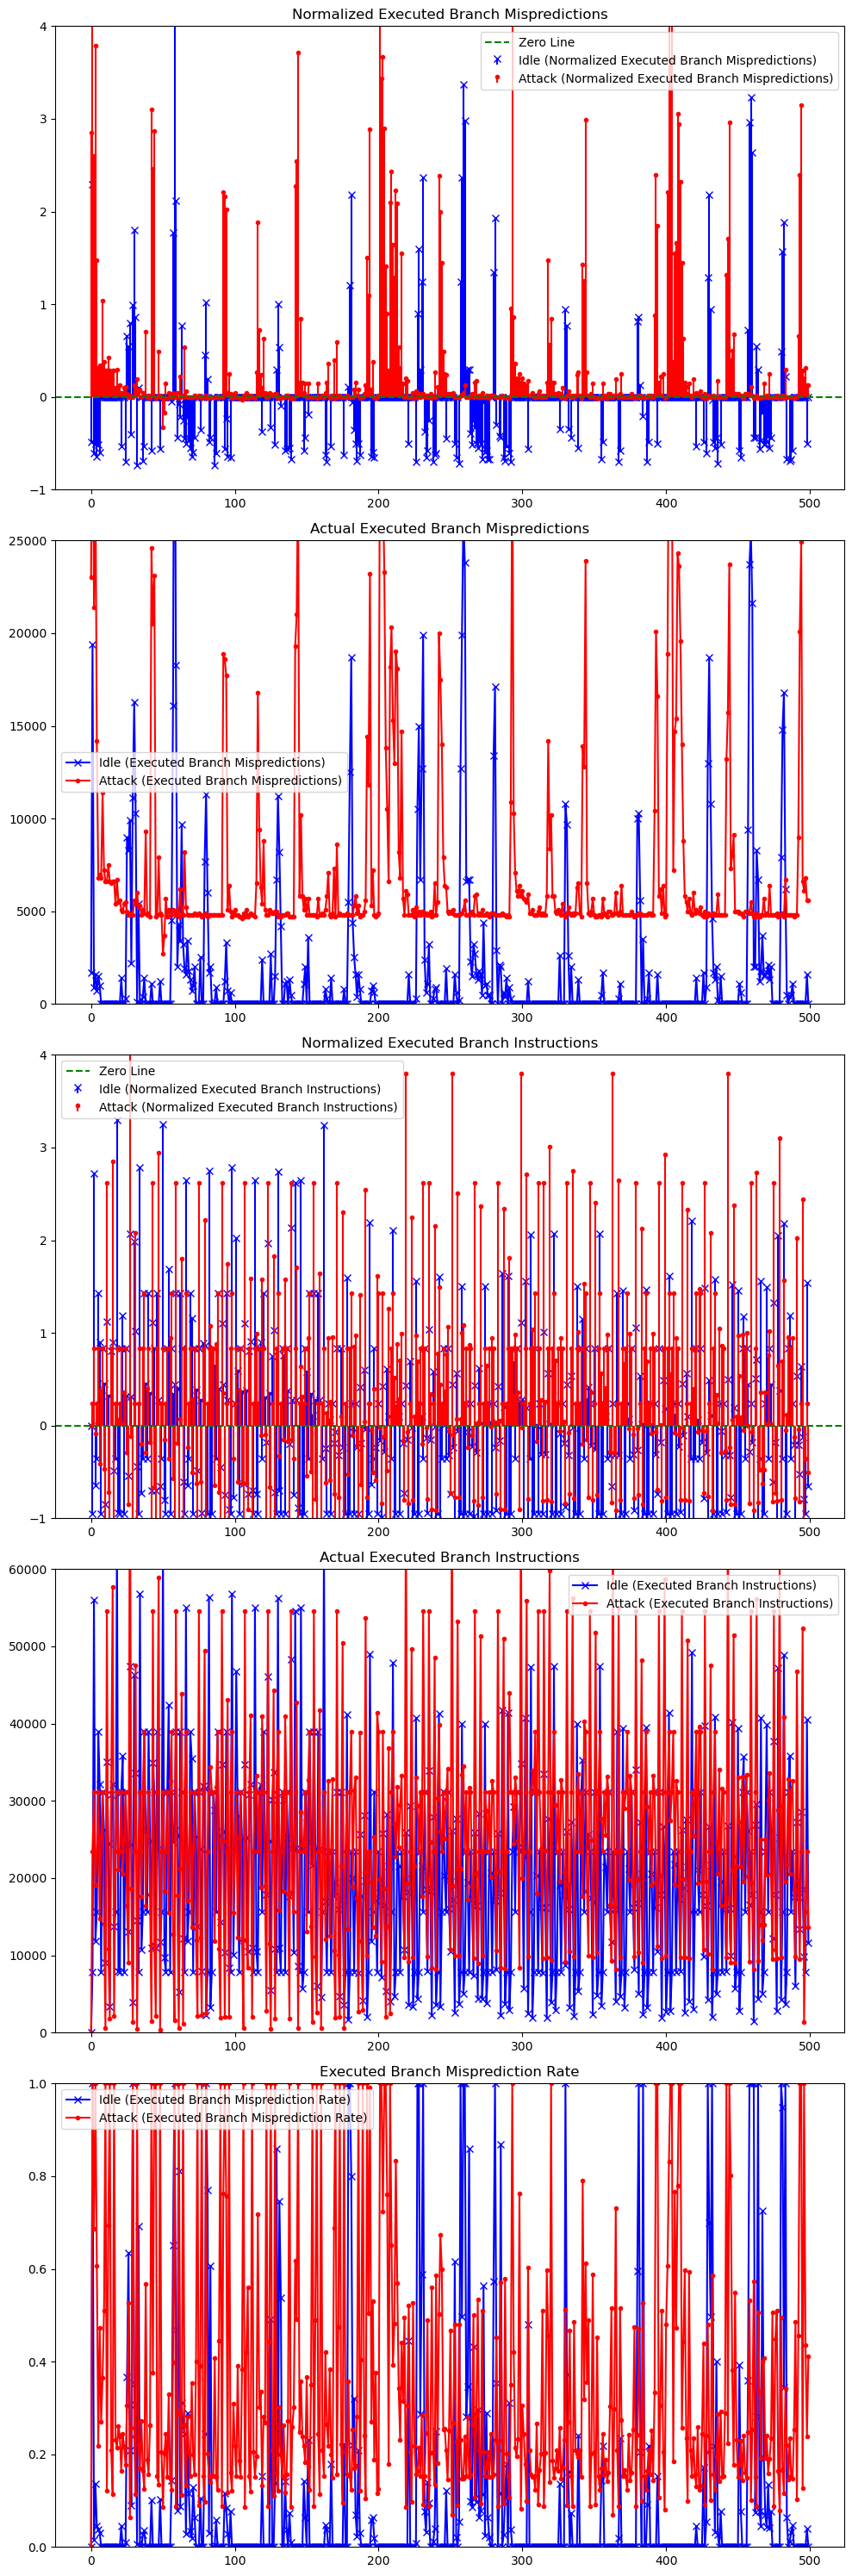

In [50]:
plotFunction(executed_branch_mispredictions, executed_branch_instructions, executed_branch_misprediction_rate,60000)

starting: Retired Branch Misprediction Rate
Mean of non-zero values (Idle, Retired Branch Mispredictions): 4443.979057591623
Standard Deviation of non-zero values (Idle, Retired Branch Mispredictions): 6255.822793255236
Mean of non-zero values (Idle, Retired Branch Instructions): 17095.209580838324
Standard Deviation of non-zero values (Idle, Retired Branch Instructions): 12264.690273955239


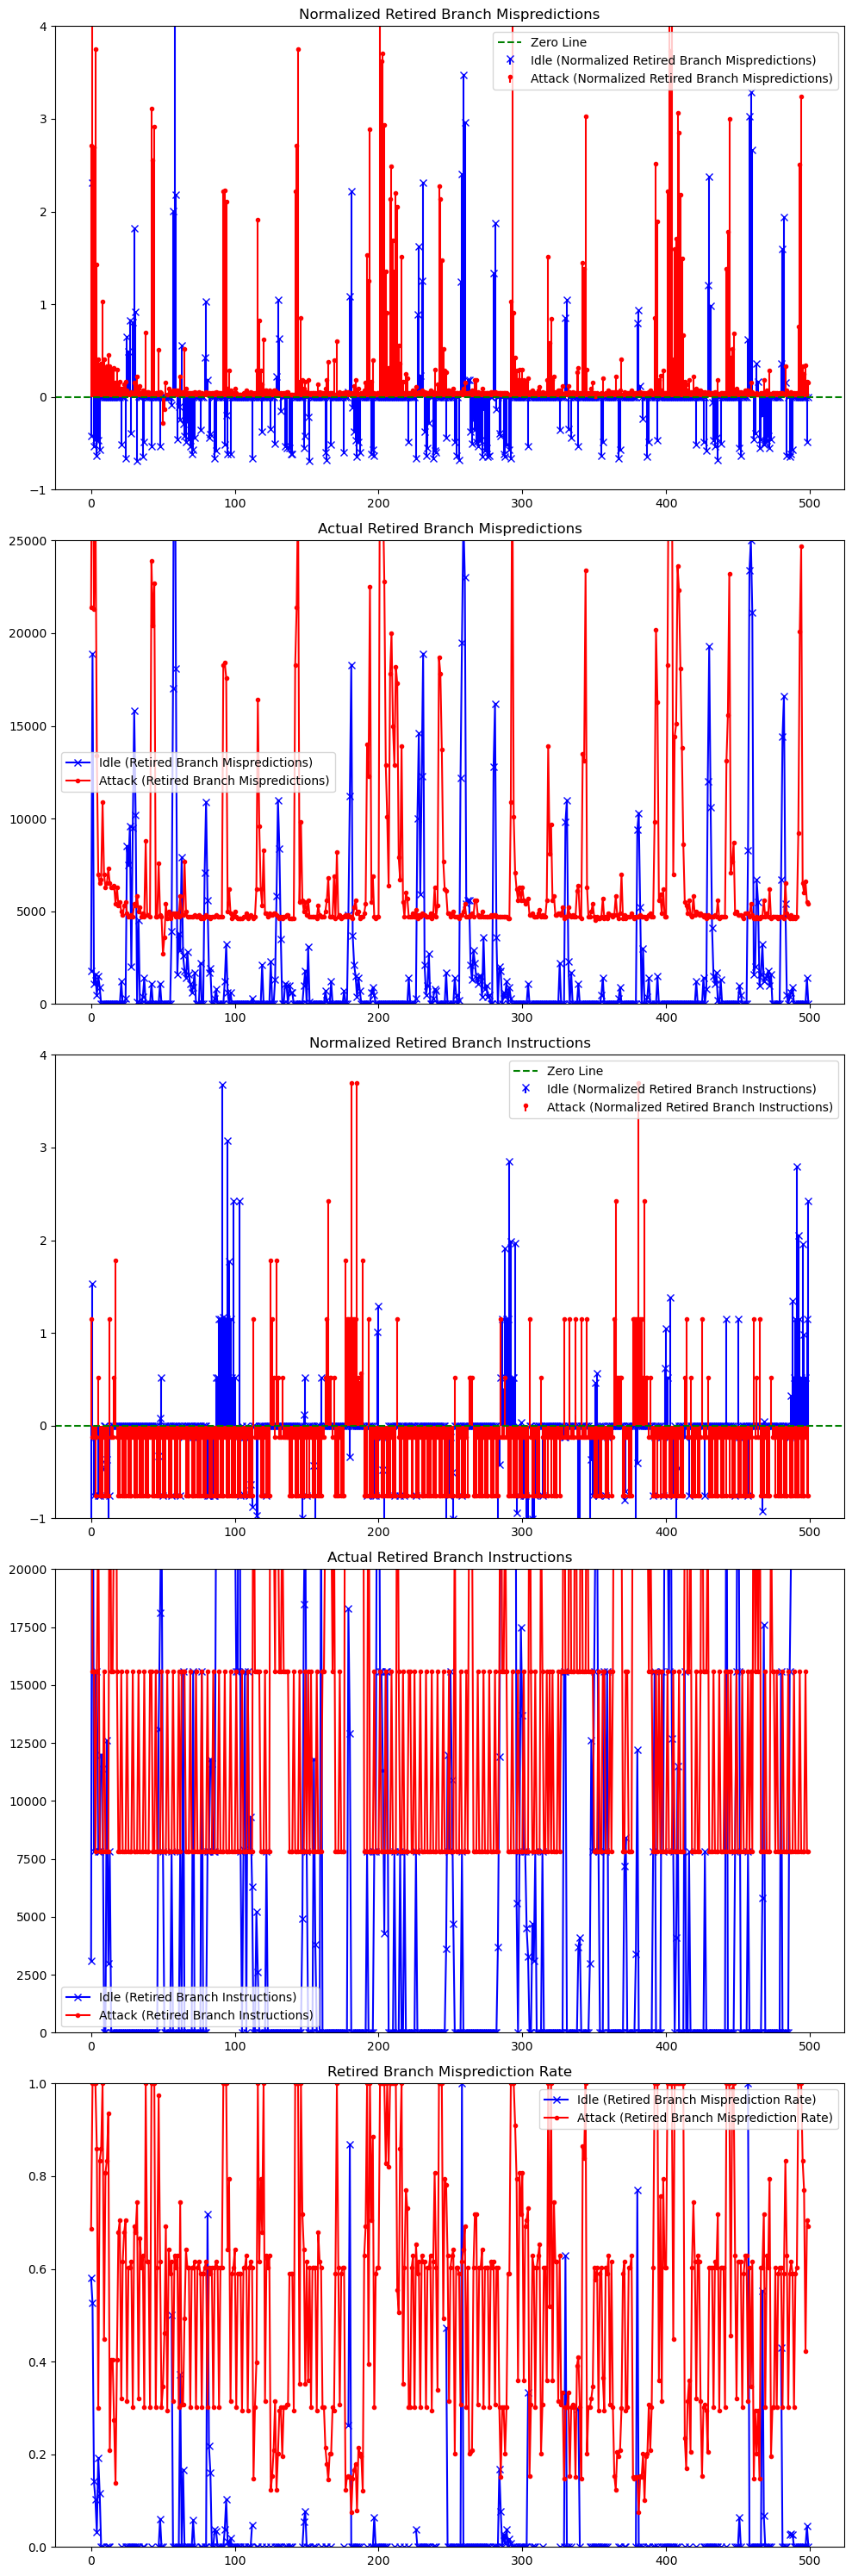

In [51]:
plotFunction(retired_branch_mispredictions, retired_branch_instructions, retired_branch_misprediction_rate,20000)

starting: Executed Conditional Misprediction Rate
Mean of non-zero values (Idle, Executed Conditional Branch Mispredictions): 4322.751322751323
Standard Deviation of non-zero values (Idle, Executed Conditional Branch Mispredictions): 5992.81137152165
Mean of non-zero values (Idle, Executed Conditional Branches): 25737.875751503005
Standard Deviation of non-zero values (Idle, Executed Conditional Branches): 12690.539289028608


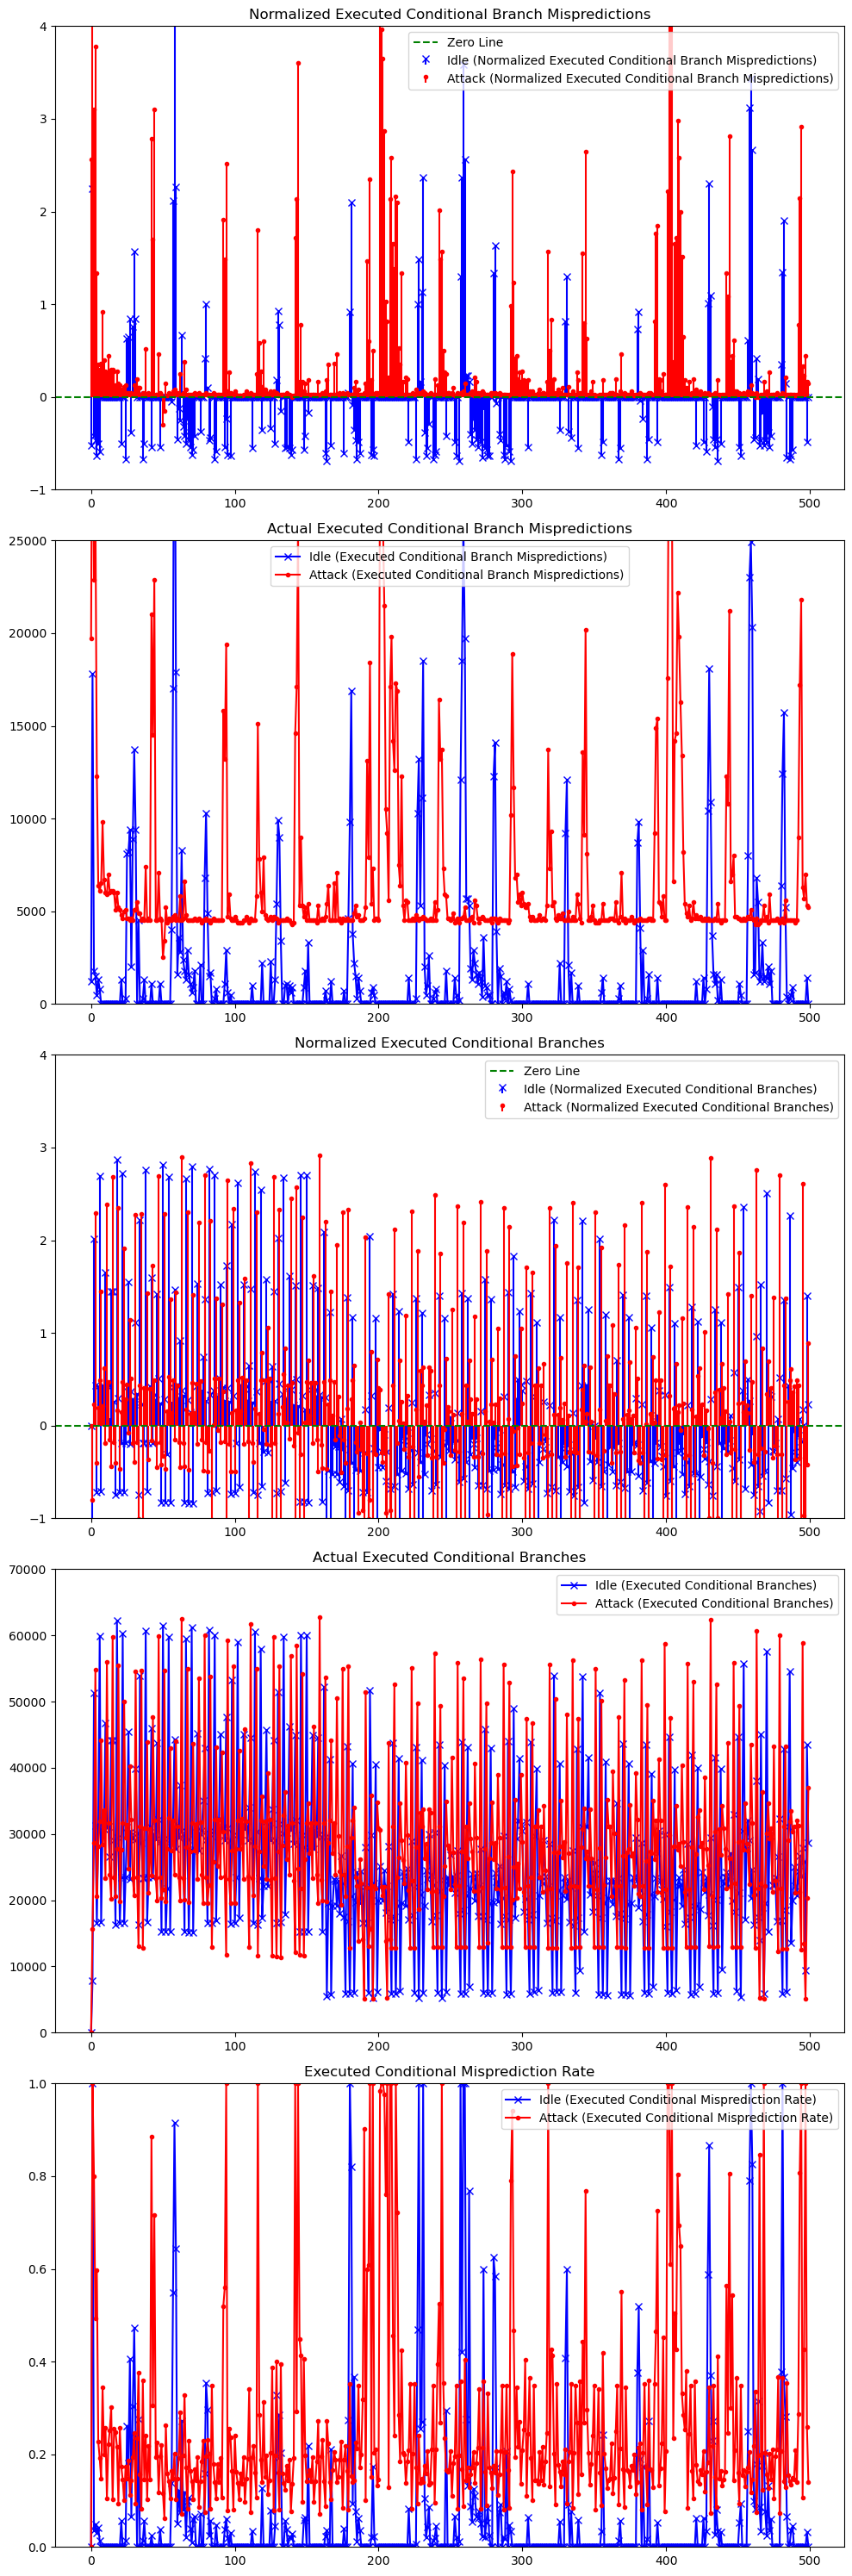

In [52]:
plotFunction(executed_conditional_branch_mispredictions, executed_conditional_branches, executed_conditional_misprediction_rate,70000)

starting: Retired Near-Taken to Conditional misprediction Rate
Mean of non-zero values (Idle, Retired Near-Taken Branch Mispredictions): 2506.989247311828
Standard Deviation of non-zero values (Idle, Retired Near-Taken Branch Mispredictions): 4990.174624024909
Mean of non-zero values (Idle, Retired Conditional Branches): 16316.763005780347
Standard Deviation of non-zero values (Idle, Retired Conditional Branches): 12130.607403282696


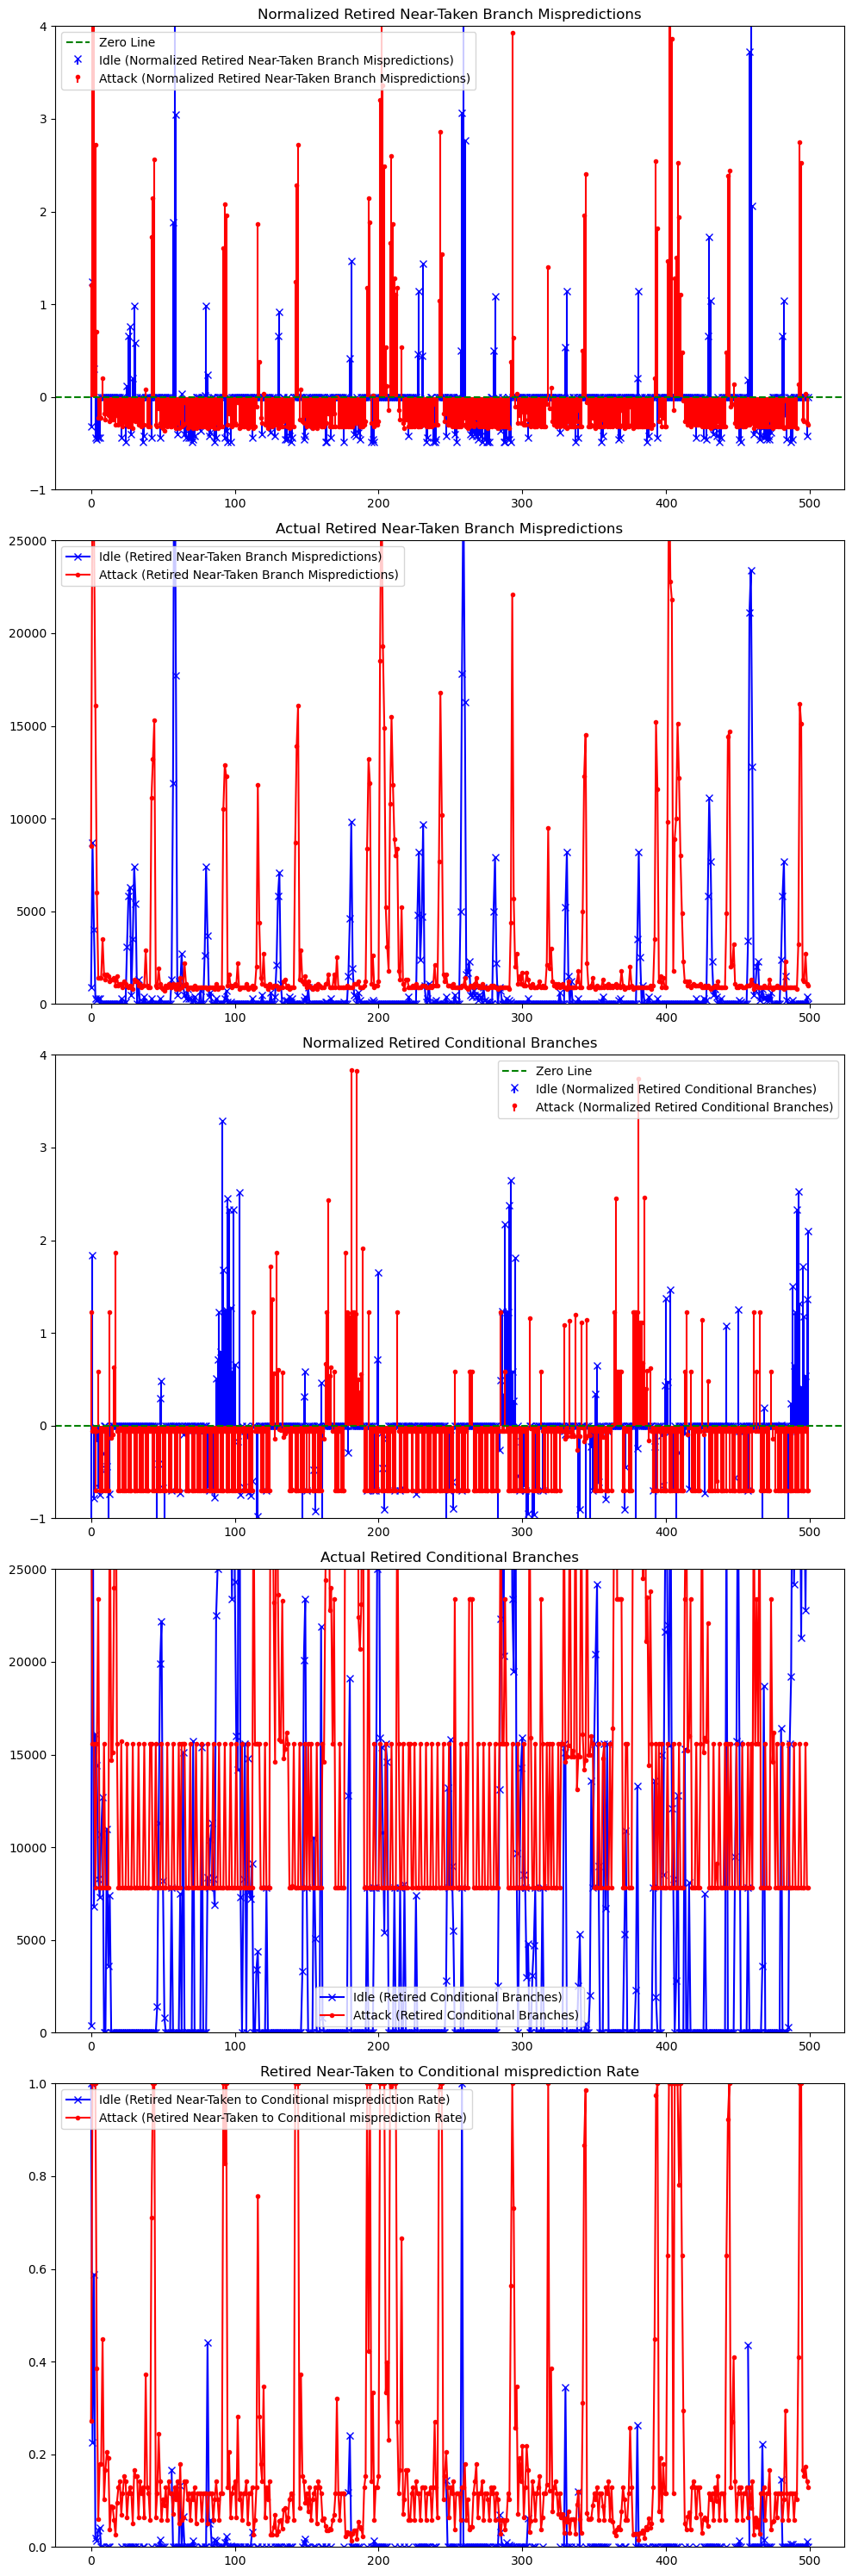

In [53]:
plotFunction(retired_near_taken_mispredictions, retired_conditional_branches, retired_near_taken_misprediction_rate,25000)